# Crop Recommodation System Using ML

In [5]:
import pandas as pd
import numpy as np

In [6]:
crs_data=pd.read_csv("Crop_recommendation.csv")
crs_df=pd.DataFrame(crs_data)
display(crs_df)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
crs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
crs_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

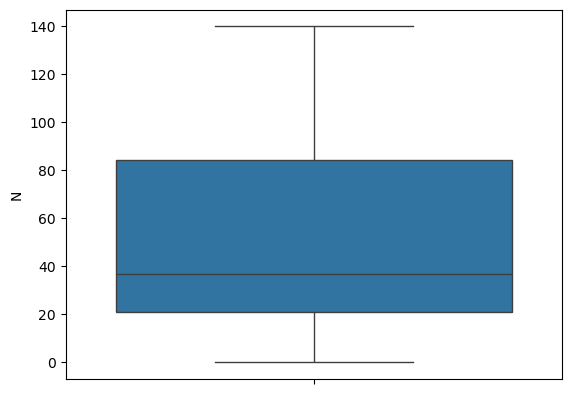

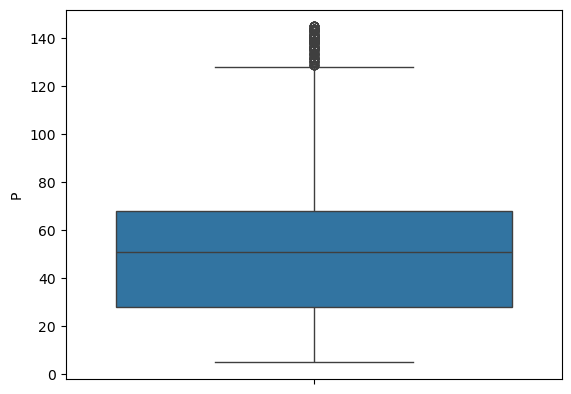

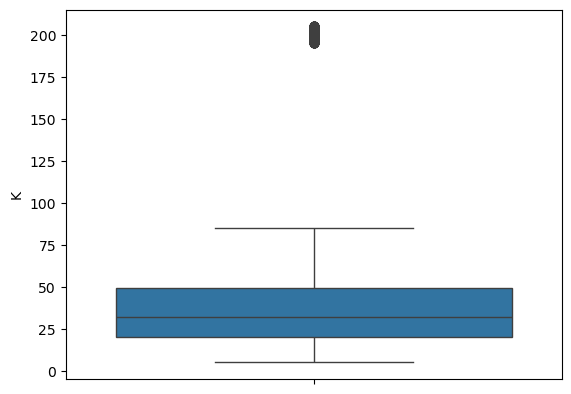

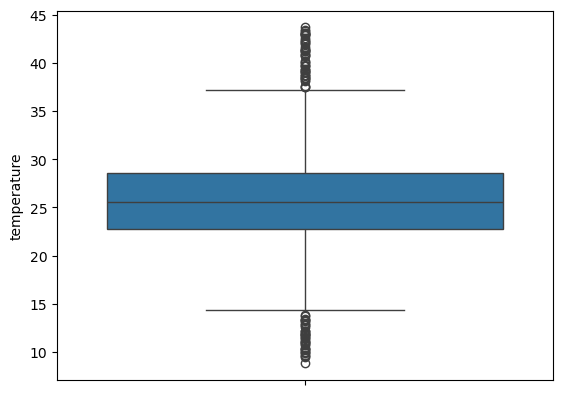

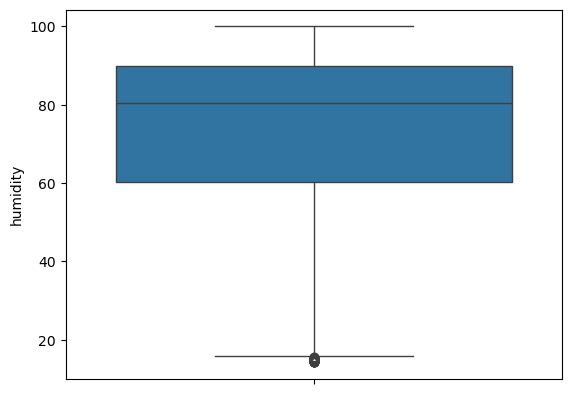

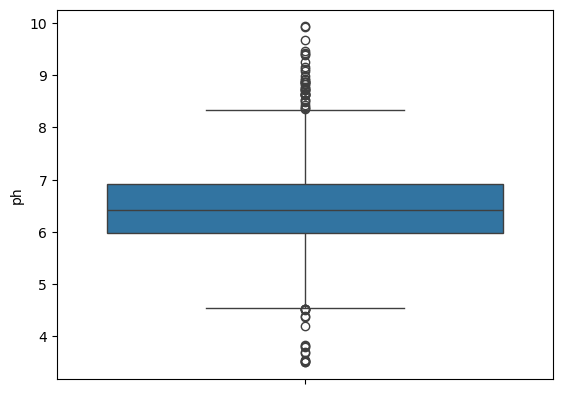

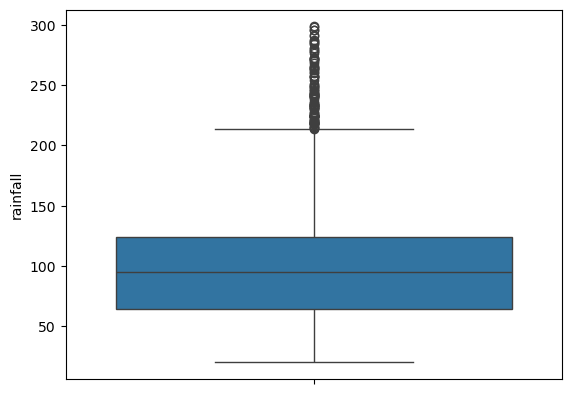

In [10]:
# check - boxplot
def boxplots(col):
    sns.boxplot(crs_df[col])
    plt.show()

for i in list(crs_df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [11]:
crs_df["K"].describe()

count    2200.000000
mean       48.149091
std        50.647931
min         5.000000
25%        20.000000
50%        32.000000
75%        49.000000
max       205.000000
Name: K, dtype: float64

In [12]:
Q1 = 20.0
Q3 = 49.0
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
crs_df['K'] = np.where(crs_df['K']>upper_limit, upper_limit,crs_df['K'])

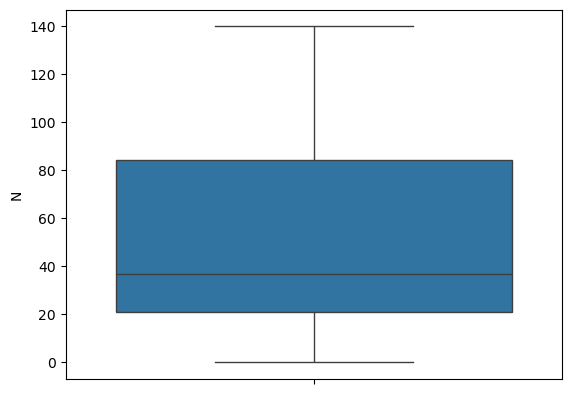

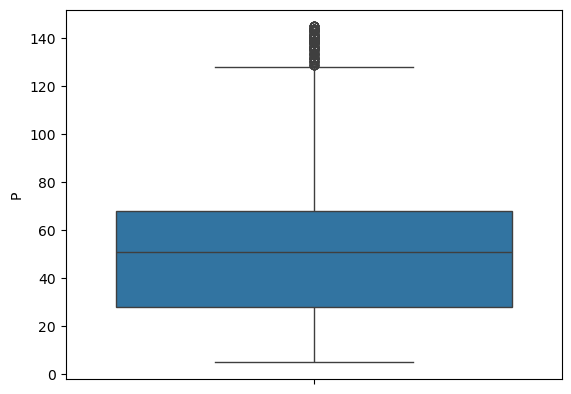

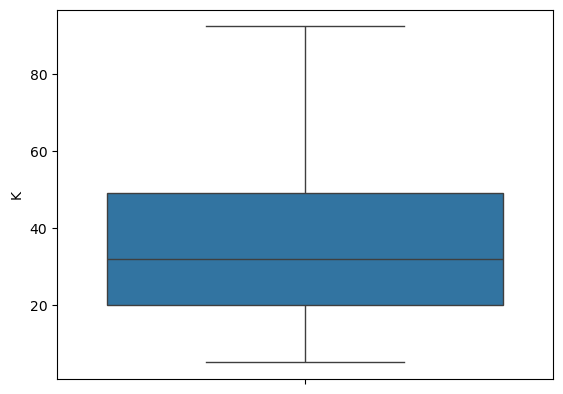

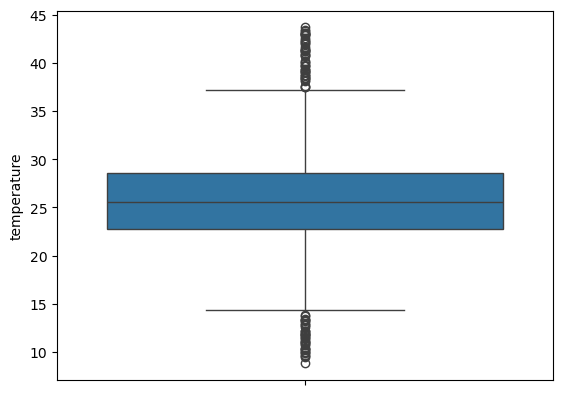

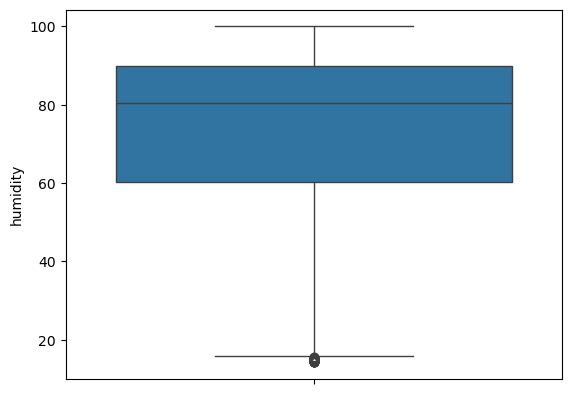

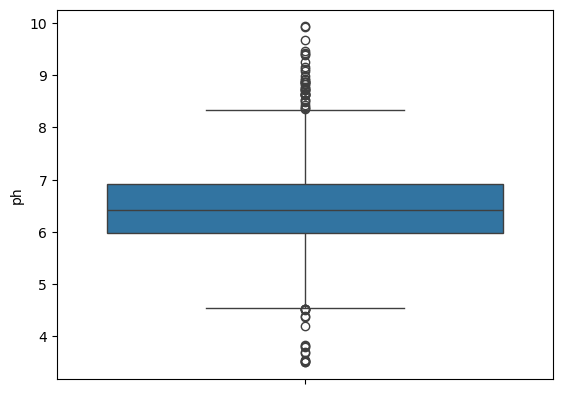

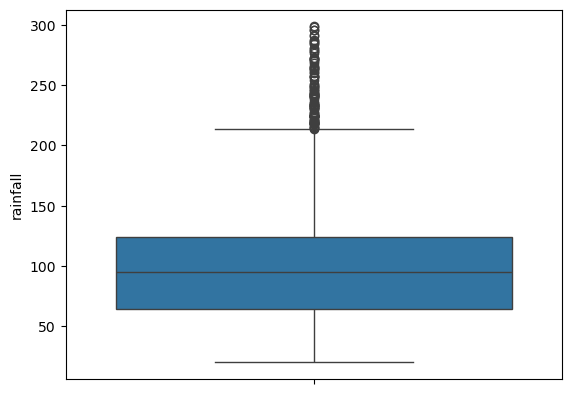

In [13]:
def boxplots(col):
    sns.boxplot(crs_df[col])
    plt.show()

for i in list(crs_df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [14]:
crs_df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

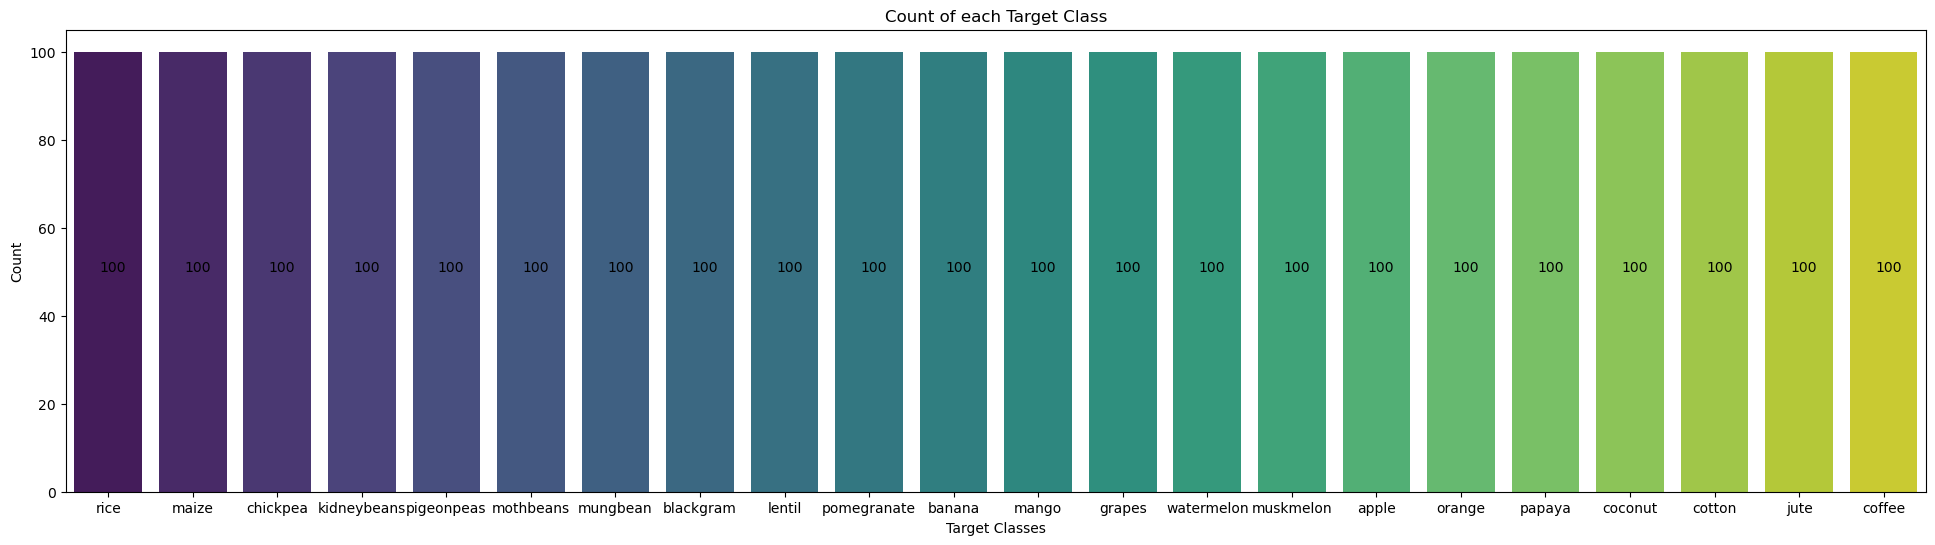

In [15]:
plt.figure(figsize=(24, 6))
gragh_count= sns.countplot(x='label',data=crs_df,hue='label', palette='viridis') 
plt.xlabel('Target Classes') 
plt.ylabel('Count') 
plt.title('Count of each Target Class')  


# Get value in bar
for patch in gragh_count.patches:
    count = int(patch.get_height())
    x_coor = patch.get_x()+0.3
    y_coor = count / 2
    if count!=0:
        gragh_count.annotate(count, (x_coor, y_coor),color='black')
plt.show()

In [16]:
crs_df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

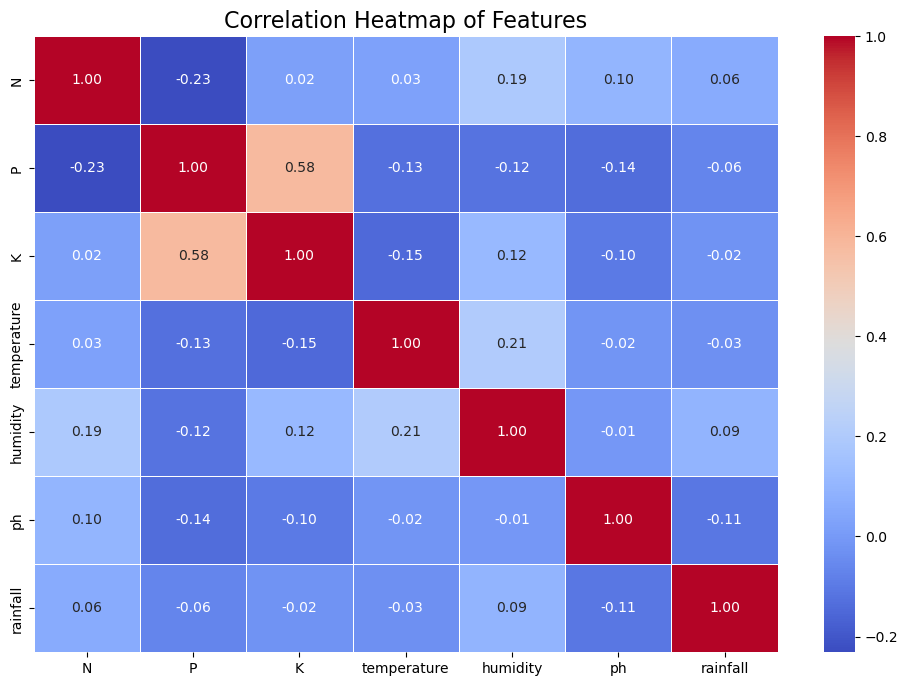

In [17]:
corr_matrix = crs_df.drop('label', axis=1).corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

## Train and Test

In [19]:
x=crs_df.iloc[:,crs_df.columns!='label']  # Features(Input variable)
y=crs_df.iloc[:,crs_df.columns=='label']  # Target Variable

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state= 42)

## Model Building

In [22]:
from sklearn.metrics import accuracy_score,f1_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings 
warnings.filterwarnings('ignore') 

In [23]:
#4. Train Models
#Logistic Regression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
model_lr=lr
y_pred_lr = lr.predict(X_train)

#Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
model_dt=dt
y_pred_dt = dt.predict(X_train)

#Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
model_rf=rf
y_pred_rf = rf.predict(X_train)

#Support Vector Machine (SVM)

svm = SVC(random_state=42)
svm.fit(X_train, y_train)
model_svm=svm
y_pred_svm = svm.predict(X_train)

#Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
model_nb=nb
y_pred_nb = nb.predict(X_train)

#k-Nearest Neighbors (kNN)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
model_knn=knn
y_pred_knn = knn.predict(X_train)

### Accuracy Score

In [25]:
# Logistic Regression
lr_acc=accuracy_score(y_train,y_pred_lr) 
LR=lr_acc*100
print(f"The score for Logistic Regression is {LR:.2f}% with estimators.")
print(" ")
 
#Decision Tree
dt_acc=accuracy_score(y_train,y_pred_dt) 
DT=dt_acc*100
print(f"The score for Decision Treen is {DT:.2f}% with estimators.")
print(" ")
 
# Random Forest
rf_acc=accuracy_score(y_train,y_pred_rf) 
RF=rf_acc*100
print(f"The score for Random Forest is {RF:.2f}% with estimators.")
print(" ")
 
# Support Vector Machine (SVM)
svm_acc=accuracy_score(y_train,y_pred_svm) 
SVM=svm_acc*100
print(f"The score for Support Vector Machine is {SVM:.2f}% with estimators.")
print(" ")
 
# Naive Bayes
nb_acc=accuracy_score(y_train,y_pred_nb) 
NB=nb_acc*100
print(f"The score for Naive Bayes is {NB:.2f}% with estimators.")
print(" ")
 
# K-Nearest Neighbors (KNN)
knn_acc=accuracy_score(y_train,y_pred_knn) 
KNN=knn_acc*100
print(f"The score for K-Nearest Neighborsn is {KNN:.2f}% with estimators.")

The score for Logistic Regression is 99.26% with estimators.
 
The score for Decision Treen is 100.00% with estimators.
 
The score for Random Forest is 100.00% with estimators.
 
The score for Support Vector Machine is 98.30% with estimators.
 
The score for Naive Bayes is 99.49% with estimators.
 
The score for K-Nearest Neighborsn is 98.98% with estimators.


### Accuracy Visualization 

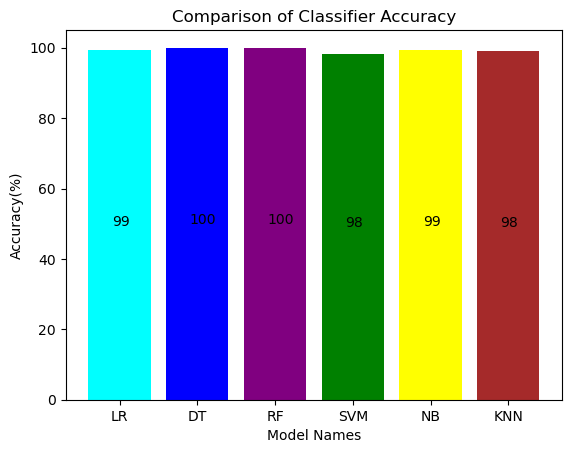

In [27]:
height = [LR,DT,RF,SVM,NB,KNN] 
bars = ('LR','DT','RF','SVM','NB','KNN') 
x_pos = np.arange(len(bars)) 
gra_count=plt.bar(x_pos, height, color=['cyan','blue','purple','green','yellow','brown']) 
plt.xticks(x_pos, bars) 

# Get value in bar
for patch in gra_count.patches:
    count = int(patch.get_height())
    x_coor = patch.get_x()+0.3
    y_coor = count / 2
    if count!=0:
        plt.annotate(count, (x_coor, y_coor),color='black')
plt.xlabel('Model Names')
plt.ylabel('Accuracy(%)')
plt.title('Comparison of Classifier Accuracy')
plt.show()

#### Decision Tree and Random Forest is giving 100% outcome. So, I will take Decision Tree Classifier

In [29]:
import pickle 
with open('Crop.pickle','wb') as f: 
    pickle.dump(model_dt,f) 
    f.close() 

In [30]:
model = pickle.load(open('Crop.pickle', 'rb'))

In [31]:
model

DecisionTreeClassifier(random_state=42)

In [32]:
crs_df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34.0,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30.0,23.603016,60.396475,6.779833,140.937041,coffee


In [33]:
Nitrogen=float(input("Enter the ratio of Nitrogen content in soil: "))
Phosphorous=float(input("Enter the ratio of Phosphorous content in soil: "))
Potassium=float(input("Enter the ratio of Potassium content in soil: "))
Temperature=float(input("Enter the temperature in degree Celsius: "))
Humidity=float(input("Enter the relative Humidity in %: "))
Ph_Value=float(input("Enter the ph value of the soil: "))
Rainfall=float(input("Enter the rainfall in mm: "))

Enter the ratio of Nitrogen content in soil:  104.0
Enter the ratio of Phosphorous content in soil:  18.0
Enter the ratio of Potassium content in soil:  30.0
Enter the temperature in degree Celsius:  23.6030
Enter the relative Humidity in %:  60.3964
Enter the ph value of the soil:  6.7798
Enter the rainfall in mm:  140.9370


In [67]:
col=np.array([Nitrogen, Phosphorous, Potassium, Temperature, Humidity, Ph_Value, Rainfall])
crs_df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [69]:
col

array([104.    ,  18.    ,  30.    ,  23.603 ,  60.3964,   6.7798,
       140.937 ])

In [71]:
Result=model.predict([col])
Result

array(['coffee'], dtype=object)

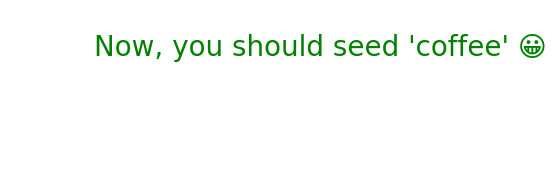

In [73]:
import emoji
plt.figure(figsize=(4,2))
plt.text(1.0, 0.7,emoji.emojize(f"Now, you should seed '{Result[0]}' :grinning_face:"),  fontsize=20, ha='center', color='green')
plt.axis('off')
plt.show()